In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
Phd_v1 = pd.read_csv('/home/mertes/Documents/DU_Data_Analyst/PhD.dataset.csv', dtype={"Date de premiere inscription en doctorat": "object"})

In [3]:
Phd_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  object 
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [4]:
# Correction du nommage de la variable discipline
Phd_v1.rename(columns={19: "Discipline"}, inplace=True)

In [5]:
Phd_v1.iloc[:,0]

0              '0
1              '1
2              '2
3               3
4              '4
           ...   
448042     448042
448043    '448043
448044    '448044
448045    '448045
448046    '448046
Name: Unnamed: 0, Length: 448047, dtype: object

In [6]:
Phd_v1.iloc[:,19]

0           Droit et Science Politique
1         Materiaux, Milieux et Chimie
2                             Medecine
3           Droit et Science Politique
4                                  SHS
                      ...             
448042    Materiaux, Milieux et Chimie
448043        Science de l''ingÃ©nieur
448044                    Informatique
448045                  MathÃ©matiques
448046                        Medecine
Name: Discipline_prÃ©di, Length: 448047, dtype: object

In [7]:
Phd_v1[["Discipline"]].head()

,Discipline
0,Driot prive
1,"Mecanique des solides, des materiaux, des stru..."
2,Medecine
3,Science politique
4,Geographie


In [8]:
# Détection d'une erreur dans les données. Elle peut être corrigée en modifiant le caractère de fin de ligne par l'option lineterminator
Phd_v1["Langue_rec;;;;;;;;;;;;;;;;"].unique()

array(["NA';;;;;;;;;;;;;;;;", "Français';;;;;;;;;;;;;;;;",
       'NA;;;;;;;;;;;;;;;;', 'Français;;;;;;;;;;;;;;;;',
       "Anglais';;;;;;;;;;;;;;;;", 'Anglais;;;;;;;;;;;;;;;;',
       "Autre';;;;;;;;;;;;;;;;", 'Autre;;;;;;;;;;;;;;;;',
       'NA;;;;;;;;;;;;;;', "Bilingue';;;;;;;;;;;;;;;;",
       'Bilingue;;;;;;;;;;;;;;;;', "Français';;;;;;;;;;;;;;",
       "NA';;;;;;;;;;;;;;", 'Français;;;;;;;;;;;;;;',
       'Anglais;;;;;;;;;;;;;;', 'Autre;;;;;;;;;;;;;;'], dtype=object)

In [9]:
# Correction des Erreurs de type pour les variables "Identifiant auteur", "Date de premiere inscription en doctorat" et "Date de soutenance"
Phd_v1 = pd.read_csv('/home/mertes/Documents/DU_Data_Analyst/PhD.dataset.csv',
                     parse_dates=["Date de premiere inscription en doctorat", 
                                  "Date de soutenance"],
                     lineterminator=";")

In [10]:
Phd_v1["Langue_rec"].unique()

array(["NA'", "Français'", nan, 'Français', "Anglais'", 'Anglais',
       "Autre'", 'Autre', "Bilingue'", 'Bilingue'], dtype=object)

In [11]:
# Transformation des valeurs manquantes non détectées
Phd_v1["Langue_rec"].replace({"NA'": np.nan}, inplace=True)

In [12]:
Phd_v1["Langue_rec"].unique()

array([nan, "Français'", 'Français', "Anglais'", 'Anglais', "Autre'",
       'Autre', "Bilingue'", 'Bilingue'], dtype=object)

In [13]:
# Affichage du jeu de données corrigé avec la variable Langue_rec
Phd_v1[["Langue_rec"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448048 entries, 0 to 448047
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Langue_rec  383927 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [14]:
# Chargement du nouveau jeu de donnée PhD_v2
Phd_v2 = pd.read_csv('/home/mertes/Documents/DU_Data_Analyst/projet_1/PhD_v2.csv', low_memory=False)
Phd_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9   Statut                                    447644 non-null  object 
 10  Date de premiere ins

In [15]:
# Type erronné pour la variable 'Publication dans theses.fr'qui contient des dates
Phd_v2["Publication dans theses.fr"].head()

0    26-01-12
1    22-11-13
2    24-05-13
3    12-07-13
4    13-07-13
Name: Publication dans theses.fr, dtype: object

In [16]:
# Changement de type pour les colonnes indiquant des dates
Phd_v2["Date de premiere inscription en doctorat"] = pd.to_datetime(Phd_v2["Date de premiere inscription en doctorat"])
Phd_v2["Date de soutenance"] = pd.to_datetime(Phd_v2["Date de soutenance"])
Phd_v2["Publication dans theses.fr"] = pd.to_datetime(Phd_v2["Publication dans theses.fr"])
Phd_v2["Mise a jour dans theses.fr"] = pd.to_datetime(Phd_v2["Mise a jour dans theses.fr"])

In [17]:
Phd_v2[["Date de premiere inscription en doctorat", 
        "Date de soutenance", 
        "Publication dans theses.fr", 
        "Mise a jour dans theses.fr"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 4 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Date de premiere inscription en doctorat  63976 non-null   datetime64[ns]
 1   Date de soutenance                        390898 non-null  datetime64[ns]
 2   Publication dans theses.fr                447644 non-null  datetime64[ns]
 3   Mise a jour dans theses.fr                447467 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 13.7 MB


In [18]:
# Nombre de valeurs manquantes par variable
missing_vars = Phd_v2.isna().sum()

In [19]:
missing_vars

Auteur                                           0
Identifiant auteur                          129989
Titre                                            9
Directeur de these                              15
Directeur de these (nom prenom)                 15
Identifiant directeur                            0
Etablissement de soutenance                      4
Identifiant etablissement                    17085
Discipline                                       5
Statut                                           0
Date de premiere inscription en doctorat    383668
Date de soutenance                           56746
Year                                         56746
Langue de la these                           63765
Identifiant de la these                          0
Accessible en ligne                              0
Publication dans theses.fr                       0
Mise a jour dans theses.fr                     177
dtype: int64

In [20]:
# Calcul du pourcentage de valeur manquantes par variables
missing_percent = Phd_v2.isna().mean() * 100

In [21]:
missing_percent

Auteur                                       0.000000
Identifiant auteur                          29.038477
Titre                                        0.002011
Directeur de these                           0.003351
Directeur de these (nom prenom)              0.003351
Identifiant directeur                        0.000000
Etablissement de soutenance                  0.000894
Identifiant etablissement                    3.816649
Discipline                                   0.001117
Statut                                       0.000000
Date de premiere inscription en doctorat    85.708286
Date de soutenance                          12.676591
Year                                        12.676591
Langue de la these                          14.244578
Identifiant de la these                      0.000000
Accessible en ligne                          0.000000
Publication dans theses.fr                   0.000000
Mise a jour dans theses.fr                   0.039540
dtype: float64

In [22]:
# Création du DataFrame contenant le pourcentage des valeurs manquantes
Phd_missing = pd.DataFrame({"categories": missing_percent.index, "percent missing": missing_percent.values})

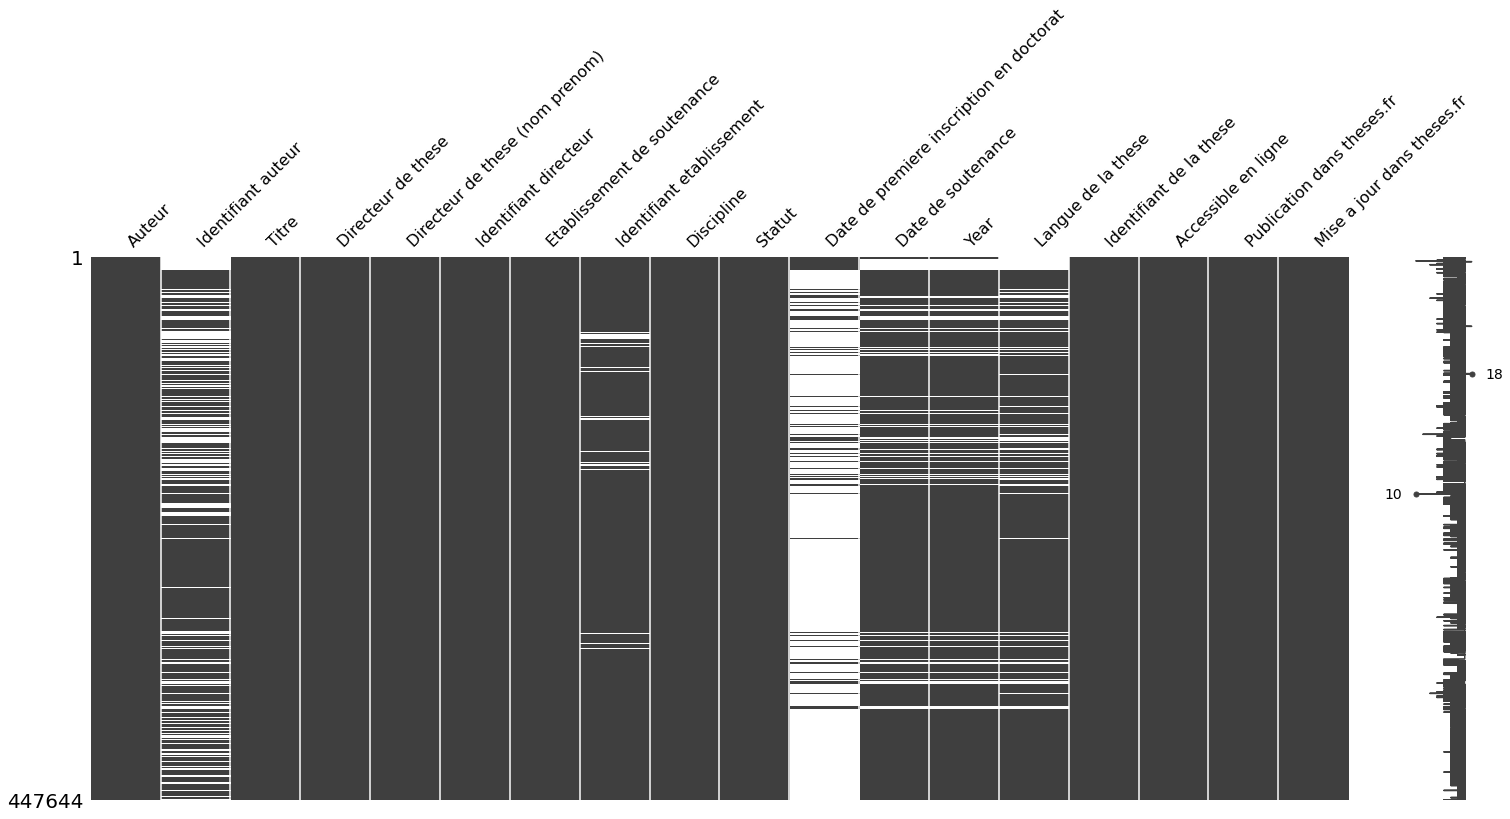

In [23]:
# Représentation graphique des valeurs manquantes par colonne
msno.matrix(Phd_v2)
plt.show()

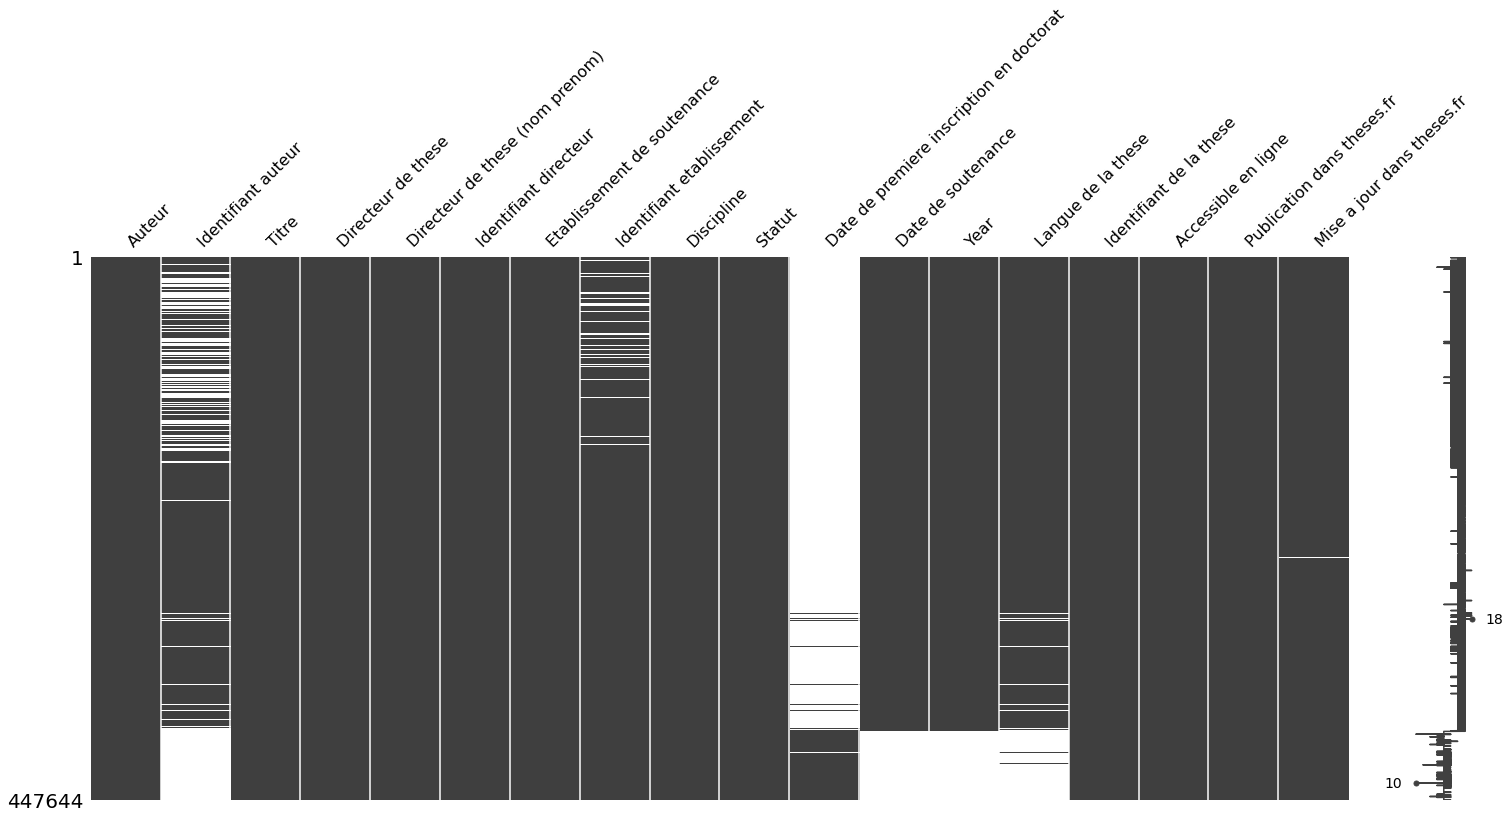

In [24]:
# Triage des données pour évaluer si les valeurs manquantes sont réparties au hazard
Phd_sort = Phd_v2.sort_values("Date de soutenance")
msno.matrix(Phd_sort)
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/val_manquantes.png", bbox_inches='tight')
plt.show()

In [25]:
# Vérification du codage des valeurs manquantes dans les langues de thèse
Phd_v2["Langue de la these"].unique()

array([nan, 'fr', 'en', 'ro', 'es', 'de', 'FR', 'zh', 'bs', 'it', 'co',
       'fren', 'enfr', 'enzh', 'pt', 'frensl', 'fres', 'zhen', 'esen',
       'itfr', 'frel', 'cs', 'frpten', 'hu', 'enfrde', 'esenfr', 'frpl',
       'elfr', 'frhu', 'frar', 'itfren', 'frit', 'frzh', 'enfrzh', 'frvi',
       'frenes', 'ru', 'defr', 'pl', 'bg', 'frkm', 'kkenfr', 'frcs',
       'ptfren', 'el', 'enfreu', 'pten', 'frpt', 'esfr', 'ptfr', 'rufr',
       'br', 'cafr', 'sr', 'enru', 'ensl', 'frde', 'frja', 'frla', 'ar',
       'ca', 'fraf', 'eu', 'enesfr', 'freu', 'rofr', 'frgrc', 'enpt',
       'encsfr', 'he', 'enptfr', 'enit', 'fresen', 'enpl', 'sv', 'eufr',
       'enfrpt', 'frbr', 'ukfren', 'frruen', 'arfr', 'hyfrru', 'csfrsk',
       'frhe', 'frru', 'brfr', 'akfr', 'zhfr', 'frms', 'enfrpl', 'frmn',
       'enfrit', 'envi', 'frro', 'frfy', 'frsl', 'enfres', 'frqu', 'as',
       'frln', 'frenpt', 'abfr', 'uk', 'roen', 'plen', 'frenzh',
       'frendees', 'enfrcs', 'itzh', 'cofr', 'frtch', 'eufres', 'ja

In [26]:
Phd_v2['Statut'].value_counts()

soutenue    381315
enCours      66329
Name: Statut, dtype: int64

In [27]:
# Affichage des valeurs de la variable Statut lorsque les date de première inscription en doctorat sont fournies
Phd_sort[Phd_sort['Date de premiere inscription en doctorat'].notna()]["Statut"].unique()

array(['enCours'], dtype=object)

In [28]:
# Affichage des langues de la thèse lorsque les date de première inscription en doctorat sont fournies
Phd_sort[Phd_sort['Date de premiere inscription en doctorat'].notna()]["Langue de la these"].value_counts()

fr      510
en       58
fren      5
enfr      1
Name: Langue de la these, dtype: int64

In [29]:
# Nombre de valeurs manquantes pour les langues de thèse lorsque la date de première inscription est fournie
Phd_sort[Phd_sort['Date de premiere inscription en doctorat'].notna()]["Langue de la these"].isna().sum()

63402

In [30]:
# Affichage des langues de la thèse lorsque les date de première inscription en doctorat ne sont pas fournies
print(Phd_sort[Phd_sort['Date de premiere inscription en doctorat'].isna()]["Langue de la these"].unique())

['fr' 'enfr' 'en' 'deenfr' 'frla' 'zhfr' 'brfr' 'fres' 'de' nan 'arfr'
 'enfres' 'abfr' 'it' 'enfrpt' 'cafr' 'fris' 'frmg' 'csfrsk' 'frln' 'es'
 'frfy' 'frpl' 'frru' 'frko' 'elenfr' 'frpt' 'defr' 'frit' 'enfrit'
 'zhenfr' 'frid' 'frja' 'frro' 'ca' 'frhe' 'elfr' 'frff' 'frtr' 'csfr'
 'pt' 'eu' 'frruuk' 'akes' 'froc' 'enro' 'frkm' 'csenfr' 'frhu' 'enfrro'
 'ro' 'ru' 'hyfrru' 'hu' 'pl' 'enfrpl' 'zh' 'eo' 'ee' 'fafr' 'as' 'enpt'
 'hyfr' 'sqfr' 'br' 'frsa' 'id' 'frhi' 'cs' 'eufr' 'bg' 'co' 'enit' 'nl'
 'enes' 'itla' 'fi' 'ar' 'frth' 'frvi' 'nlen' 'enhu' 'fritla' 'amfr'
 'zhfrit' 'fritlaoc' 'frsi' 'ab' 'enfrhu' 'envi' 'et' 'deenfrit' 'csfrla'
 'zhen' 'hy' 'am' 'arenfrit' 'azfr' 'fren' 'frkmsa' 'enpl' 'frqu'
 'frlaptes' 'frmn' 'enfrru' 'enfrja' 'cofr' 'frgl' 'enru' 'enfrde' 'frar'
 'aafr' 'frka' 'enla' 'aefr' 'sq' 'arenfr' 'bgfr' 'itfr' 'ja' 'ensl'
 'enth' 'frsl' 'frms' 'deen' 'nlenfr' 'ukfren' 'frde' 'rufr' 'plen' 'pten'
 'frsv' 'ares' 'frnv' 'eufres' 'ptfr' 'frenes' 'esen' 'frzh' 'el' 'enzh

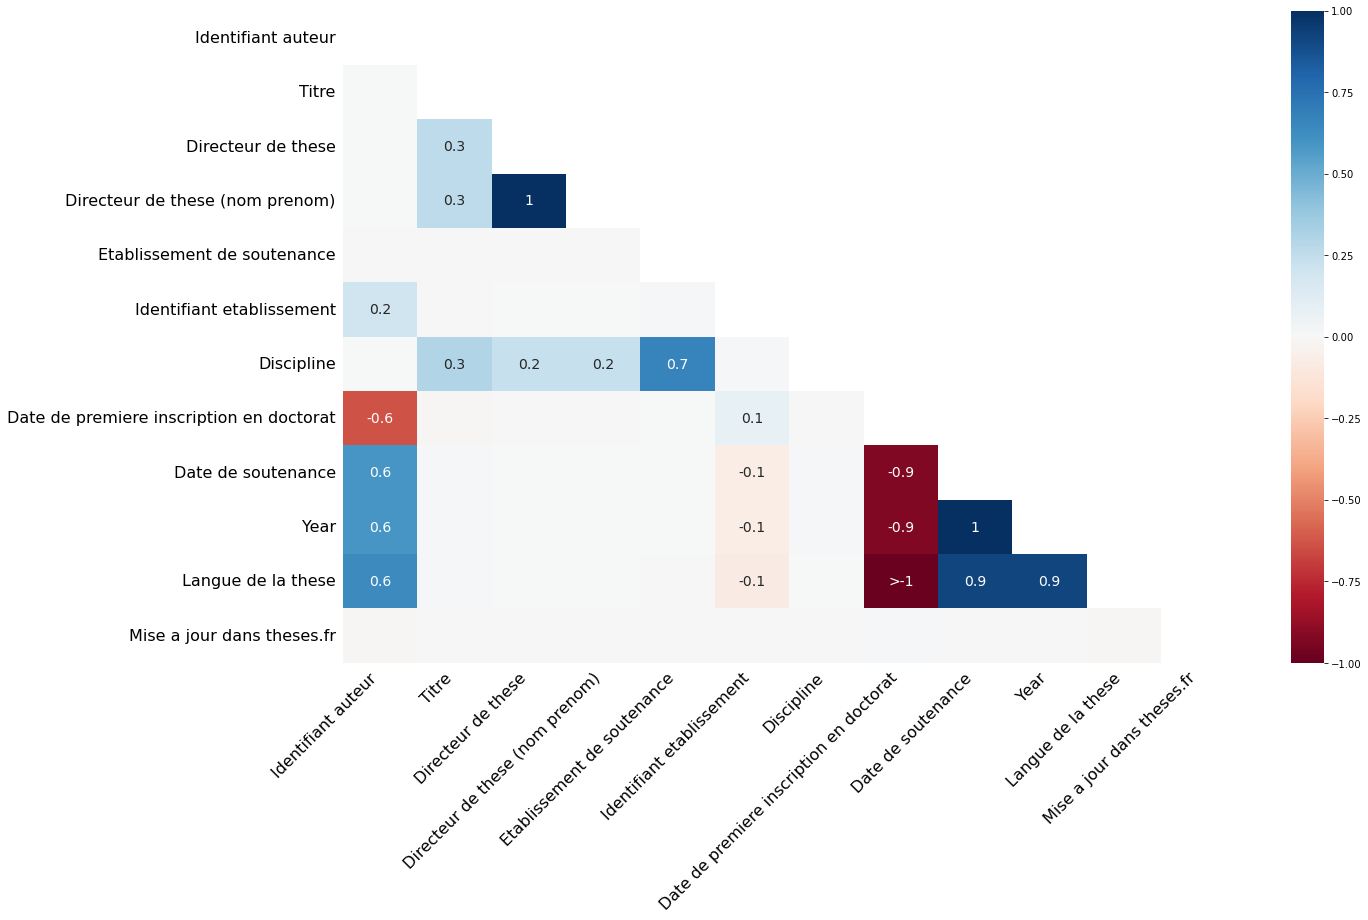

In [31]:
# Heatmap des corrélations des valeurs manquantes entre les différentes variables
msno.heatmap(Phd_v2)
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/heatmap_corr.png", bbox_inches='tight')
plt.show()

In [32]:
# Creation d'un dataframe indiquant les valeurs mnanquantes des variables avec leur statut
Phd_missing = pd.DataFrame({"Date de soutenance": Phd_v2["Date de soutenance"].isna(), 
                            "Date de premiere inscription en doctorat": Phd_v2["Date de premiere inscription en doctorat"].isna(),
                            "Langue de la these": Phd_v2["Langue de la these"].isna(),
                            "Statut": Phd_v2["Statut"]})

In [33]:
# Nombre de valeurs manquantes par variables selon leur statut
Phd_missing.groupby(by="Statut").sum()

,Date de soutenance,Date de premiere inscription en doctorat,Langue de la these
Statut,,,
enCours,56627,2353,63639
soutenue,119,381315,126


In [34]:
# Pourcentage de valeurs manquantes selon le statut pour certaines variables significatives
def percent(values):
    result = values.mean() * 100
    return result

Phd_percent_missing = pd.pivot_table(Phd_missing, values=["Date de soutenance", "Date de premiere inscription en doctorat", "Langue de la these"], index="Statut", aggfunc=percent)

In [35]:
Phd_percent_missing

,Date de premiere inscription en doctorat,Date de soutenance,Langue de la these
Statut,,,
enCours,3.547468,85.372914,95.944459
soutenue,100.000000,0.031208,0.033044


In [36]:
# Inversion des lignes et des colonnes
Phd_percent_missing = Phd_percent_missing.transpose()

In [37]:
Phd_percent_missing

Statut,enCours,soutenue
Date de premiere inscription en doctorat,3.547468,100.000000
Date de soutenance,85.372914,0.031208
Langue de la these,95.944459,0.033044


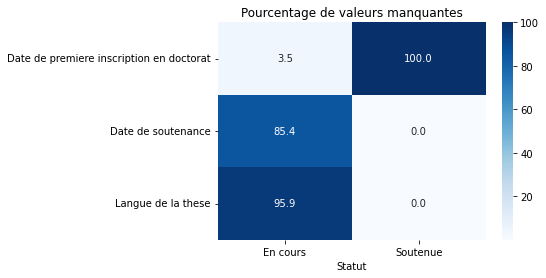

In [38]:
# Heatmap du pourcentage de valeurs manquantes de certaines variables selon le statut de la thèse
sns.heatmap(Phd_percent_missing, cmap="Blues", annot=True, fmt=".1f", xticklabels=["En cours", "Soutenue"])
plt.title("Pourcentage de valeurs manquantes")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/heatmap.png", bbox_inches='tight')
plt.show()

Le référencement numérique des thèses se fait depuis 1985 depuis le catalogue national historique Sudoc et dans le système STAR pour les thèses soutenues.
Les établissements ont une obligation légale de référencement des thèses produites.
Le système STEP archivant les thèses en préparation, depuis 1970, ne constitue pas une obligation légale de référencement par les établissements.
Seuls Sudoc et STAR doivent obigatoirement être utilsés pour référencer les thèses produites.
Il est donc plausible que les établissements ne réferencent que les thèses produites ou soutenues puisque cela est une obligation légale.
Par conséquent, il est normal que la majorité des dates des thèses en préparation soient manquantes, contrairement aux thèse soutenues, puisque pour ces dernières c'est une obligation légale de les référencer.

In [39]:
# Nombre de theses par année
dates_soutenance = Phd_v2.loc[Phd_v2["Statut"] == "soutenue", "Date de soutenance"].sort_values().value_counts()
nb_theses_year = dates_soutenance.groupby(by=dates_soutenance.index.year).sum()

In [40]:
nb_theses_year.head(10)

1973        1
1976        1
1979        1
1980        1
1982        1
1984        6
1985     3007
1986     5162
1987     8439
1988    11045
Name: Date de soutenance, dtype: int64

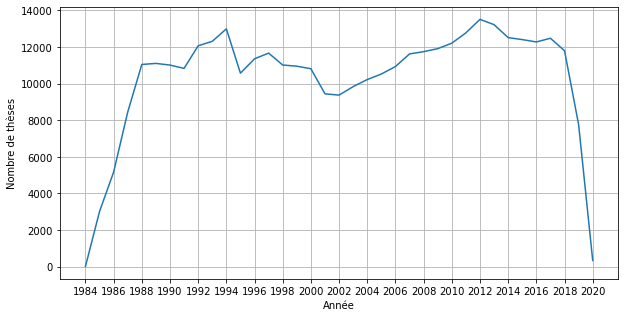

In [41]:
# Production de thèses sur la période 1984-2020
nb_theses_year = nb_theses_year.loc["1984":"2020"]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(nb_theses_year.index, nb_theses_year.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # nombre de divisions sur l'axe x pour augmenter la précision
#plt.title("Production de thèses")
plt.xlabel("Année")
plt.ylabel("Nombre de thèses")
plt.grid(True)
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/production_theses.png")
plt.show()

La production de thèses a commencé à chuter en 2018.

In [42]:
# Distribution des soutenances pour chaque mois sur toute la période
d_theses = pd.DataFrame({"date": Phd_v2[Phd_v2["Statut"] == "soutenue"]["Date de soutenance"]}).dropna()
dates_year_month = pd.DataFrame({"annee": d_theses["date"].dt.year, 
                                 "mois": d_theses["date"].dt.month, 
                                 "jour": d_theses["date"].dt.day})
dist_year_month = dates_year_month.groupby(["annee", "mois"], as_index=False)["annee"].value_counts()

In [43]:
dist_year_month.head(10)

,annee,mois,count
0,1973,1,1
1,1976,1,1
2,1979,1,1
3,1980,1,1
4,1982,1,1
5,1984,1,6
6,1985,1,3007
7,1986,1,5162
8,1987,1,8439
9,1988,1,11045


In [44]:
# Distribution du nombre de thèses pour chaque mois sur toute la période de 1984 à 2018
full_dist = dist_year_month.groupby(by="mois")["count"].agg(["sum"]).reset_index()

In [45]:
# Conversion des mois 
months = ["Jan", "Fev", "Mar", "Avr", "Mai", "Jui", "juil", "Aout", "Sept", "Oct", "Nov", "Dec"]

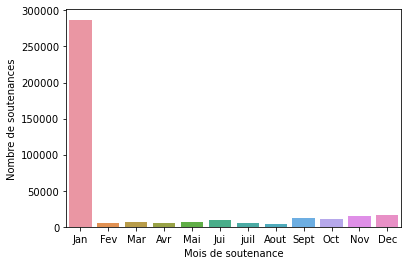

In [46]:
# Distribution du mois de soutenance sur la période de 1984 à 2018
sns.barplot(data=full_dist ,x="mois", y="sum").set_xticklabels(months)
#plt.title("Distribution du nombre de soutenances (1984 à 2018)")
plt.xlabel("Mois de soutenance")
plt.ylabel("Nombre de soutenances")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/distrib_mois.png", bbox_inches='tight')
plt.show()

In [47]:
# Calcul du nombre de thèses soutenues par mois de chaque année sur toute la période
theses_month = dist_year_month.groupby(["annee", "mois"])["count"].agg(["sum"]).reset_index()

# Calcul du nombre total de thèses pour chaque année sur toute la période
theses_year = theses_month.groupby("annee")["sum"].sum().reset_index()

# Fusion du nombre total de thèses de chaque année avec le nombre de thèses par mois pour chaque année
total_theses = theses_month.merge(theses_year, on="annee", how="inner", suffixes=["_mois", "_annee"]).set_index(["annee", "mois"])

In [48]:
total_theses.head()

,,sum_mois,sum_annee
annee,mois,,
1973,1,1,1
1976,1,1,1
1979,1,1,1
1980,1,1,1
1982,1,1,1


In [49]:
# Calcul du pourcentage de theses par mois sur une année sur toute la période
total_theses["pourcentage"] = total_theses["sum_mois"] / total_theses["sum_annee"] * 100
proportion_2005_2018 = total_theses["2005":"2018"].reset_index()

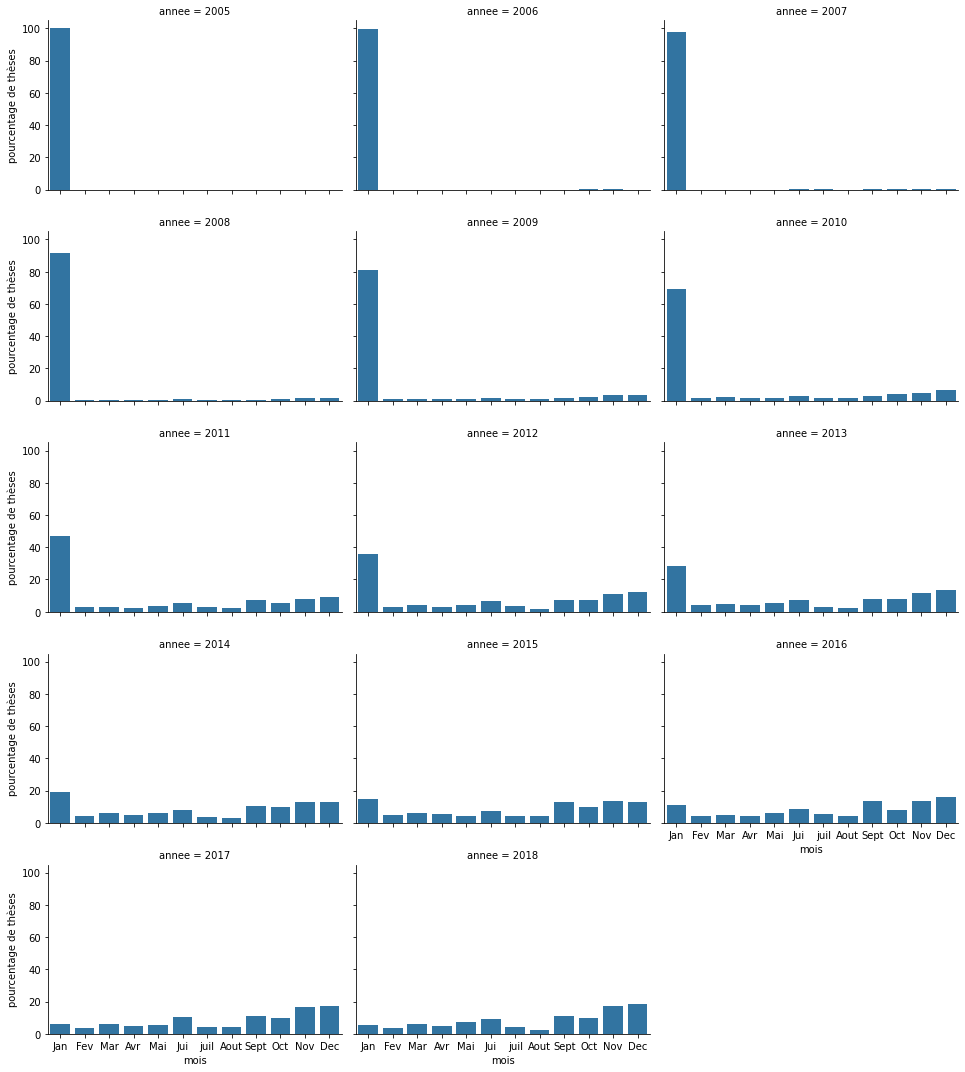

In [50]:
# Graphiques de la proportion du nombre de soutenances par mois pour chaque annee entre 2005 et 2018 
grid = sns.FacetGrid(proportion_2005_2018, col="annee", col_wrap=3, aspect=1.5, height=3)
grid.map(sns.barplot, "mois", "pourcentage", order=range(1,13))
grid.set_xticklabels(months)
grid.set_ylabels("pourcentage de thèses")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/facet_grid.png", bbox_inches='tight')
plt.show()

In [51]:
# Calcul de la somme des thèses soutenues par mois et de l'écart type pour toute la période de 2005 à 2018
total_theses_month = total_theses["2005":"2018"].groupby("mois")["sum_mois"].agg(["sum", "std"])

# Calcul du nombre total de theses soutenues sur toute la période de 2005 à 2018
total_theses = theses_year["sum"].sum()

In [52]:
# calcul du pourcentage de theses soutenues par mois sur toute la période de 2005 à 2018
total_theses_month["percent_theses"] = total_theses_month["sum"] / total_theses * 100

# calcul du pourcentage de l'écart à la moyenne du nombre de thèses par mois sur toute la période de 2005 à 2018
total_theses_month["percent_std"] = total_theses_month["std"] / total_theses * 100

In [53]:
total_theses_month.head()

,sum,std,percent_theses,percent_std
mois,,,,
1,83220,4204.121374,21.831289,1.102877
2,4151,209.651858,1.088941,0.054998
3,5684,306.775204,1.491096,0.080477
4,4583,244.345935,1.202269,0.064100
5,5745,318.217552,1.507099,0.083479


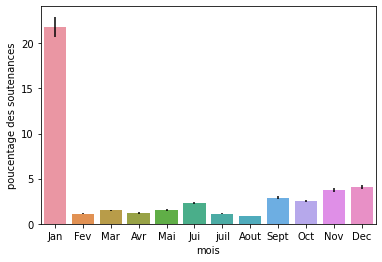

In [54]:
# Proportion du nombre de thèses par mois sur toute la période de 2005 à 2018 
sns.barplot(data=total_theses_month.reset_index(), x="mois", y="percent_theses", yerr=total_theses_month["percent_std"]).set_xticklabels(months)
#plt.title("Proportion des thèses (2005 à 2018)")
plt.xlabel("mois")
plt.ylabel("poucentage des soutenances")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/proportion_theses.png")
plt.show()

In [55]:
# Nombre de soutenances journalier par mois pour toute la période entre 2005-2018
df = dates_year_month[(dates_year_month["annee"] >= 2005) & (dates_year_month["annee"] <= 2018)].groupby(["mois", "jour"], as_index=False).count()

In [56]:
# Calcul du pourcentage de thèses par jour dans le mois.
df["pourcent"] = round(df["annee"] / total_theses * 100, 2)

In [57]:
df

,mois,jour,annee,pourcent
0,1,1,77809,20.41
1,1,2,128,0.03
2,1,3,62,0.02
3,1,4,108,0.03
4,1,5,5,0.00
...,...,...,...,...
358,12,27,8,0.00
359,12,28,8,0.00
360,12,29,5,0.00
361,12,30,2,0.00


In [58]:
# Proportion des soutenances du mois de janvier pour chaque année sur la période de 2005 à 2018
proportion_janvier = proportion_2005_2018[proportion_2005_2018["mois"] == 1]

In [59]:
proportion_janvier.head()

,annee,mois,sum_mois,sum_annee,pourcentage
0,2005,1,10522,10522,100.000000
1,2006,1,10887,10932,99.588364
12,2007,1,11351,11620,97.685026
24,2008,1,10742,11745,91.460196
36,2009,1,9684,11909,81.316651


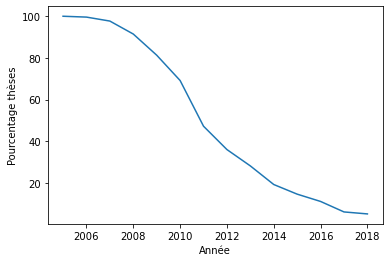

In [60]:
# Représentation graphique de la proportion du nombre de thèses en janvier
sns.lineplot(data=proportion_janvier, x="annee", y="pourcentage")
#plt.title("Proportion des thèses en janvier")
plt.xlabel("Année")
plt.ylabel("Pourcentage thèses")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/proportion_theses_janvier.png")
plt.show()

In [99]:
# Suppression de la date du 1er du mois de janvier
d_theses = pd.DataFrame({"date": Phd_v2[Phd_v2["Statut"] == "soutenue"]["Date de soutenance"]}).dropna()
d_theses = d_theses.drop(d_theses[d_theses["date"].dt.month == 1 & (d_theses["date"].dt.day == 1)].index)

# Selection de la période 2005-2018
theses_p = d_theses[(d_theses["date"].dt.year >= 2005) & (d_theses["date"].dt.year <= 2018)]
theses_p = pd.DataFrame({"annee": theses_p["date"].dt.year, 
                         "mois": theses_p["date"].dt.month})

# Nombre de soutenances par mois de chaque année
theses_p = theses_p.groupby(by=["annee", "mois"], as_index=False).value_counts()

# Nombre total de soutenances par mois sur toute la période
new_dist_month = theses_p.groupby(by=["mois"], as_index=False)["count"].agg(["sum", "std"])

# Nombre total de soutenances sur toute la période
total_soutenances = new_dist_month["sum"].sum()

# Calcul du pourcentage et de l'écart-type par mois sur toute la période
new_dist_month["percent_theses"] = round(new_dist_month["sum"] / total_soutenances * 100, 1)
new_dist_month["percent_std"] = round(new_dist_month["std"] / total_soutenances * 100, 1)

In [100]:
new_dist_month.head(12)

,sum,std,percent_theses,percent_std
mois,,,,
1,5411,296.309285,5.9,0.3
2,4151,209.651858,4.5,0.2
3,5684,306.775204,6.2,0.3
4,4583,244.345935,5.0,0.3
5,5745,318.217552,6.2,0.3
6,8649,463.829061,9.4,0.5
7,4334,226.303093,4.7,0.2
8,3310,182.630564,3.6,0.2
9,10916,616.807423,11.9,0.7


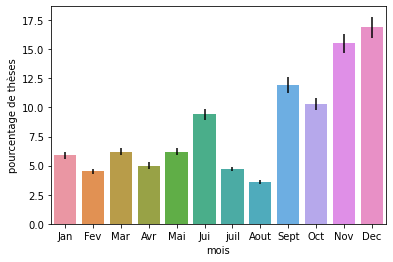

In [63]:
sns.barplot(data=new_dist_month.reset_index(), x="mois", y="percent_theses", yerr=new_dist_month["percent_std"]).set_xticklabels(["Jan", "Fev", "Mar", "Avr", "Mai", "Jui", "juil", "Aout", "Sept", "Oct", "Nov", "Dec"])
#plt.title("Proportion de thèses (2005 à 2018)")
plt.xlabel("mois")
plt.ylabel("pourcentage de thèses")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/proportion_theses_mois.png")
plt.show()

In [96]:
# Dataframe contenant la liste des auteurs et encadrants de thèses soutenues sur la période 1984-2018
Phd_periode = Phd_v2[(Phd_v2["Date de soutenance"] >= "1984") & (Phd_v2["Date de soutenance"] < "2019")].sort_values("Date de soutenance")

In [98]:
# Liste des thèses soutenues pour Cécile Martin
Phd_periode[["Identifiant auteur", "Auteur",  
             "Etablissement de soutenance", 
             "Date de soutenance",
             "Discipline"]][(Phd_periode["Auteur"].str.contains('^[Cc][Eeé]cile [Mm]artin$', regex=True))]

,Identifiant auteur,Auteur,Etablissement de soutenance,Date de soutenance,Discipline
432070,182118703,Cecile Martin,Paris 11,1989-01-01,Physique
414771,81323557,Cecile Martin,Bordeaux 2,1991-01-01,Neurosciences
426351,81323557,Cecile Martin,Clermont-Ferrand 2,1994-01-01,Sciences biologiques et fondamentales applique...
166820,81323557,Cecile Martin,Institut national agronomique Paris-Grignon,2000-01-01,Sciences biologiques fondamentales et applique...
410228,81323557,Cecile Martin,Compiegne,2001-01-01,Genie des procedes industriels
267565,179423568,Cecile Martin,Paris 9,2014-01-24,Sciences economiques
61289,203208145,Cecile Martin,Sorbonne Paris Cite,2017-01-16,Etudes cinematographiques et audiovisuelles


In [67]:
auteur_these = Phd_periode.groupby(by="Auteur").agg(these = ("Auteur", "count")).sort_values(by="these", ascending=False)

In [68]:
auteur_these

,these
Auteur,
Nicolas Martin,14
Philippe Michel,13
Franck Martin,11
Bruno Martin,10
Thierry Martin,10
...,...
Florian Longnos,1
Florian Loitsch,1
Florian Linditch,1


In [69]:
# Directeurs ayant encadrés des thèses (1984-2018)
dir_theses = Phd_periode[Phd_periode["Statut"] == "soutenue"][["Directeur de these (nom prenom)", 
                                                               "Etablissement de soutenance", 
                                                               "Discipline", 
                                                               "Date de soutenance"]]

In [70]:
# Calcul du mombre de thèses dirigées par directeur par année
#dir_theses = dir_theses.groupby("Directeur de these (nom prenom)", as_index=False)["Directeur de these (nom prenom)"].value_counts()
dir_count = dir_theses.groupby(["Directeur de these (nom prenom)", "Discipline", "Etablissement de soutenance", "Date de soutenance"]).agg(these=("Directeur de these (nom prenom)", "count"))

In [71]:
dir_count.sort_values("these", ascending=False, inplace=True)

In [72]:
dir_count.reset_index()

,Directeur de these (nom prenom),Discipline,Etablissement de soutenance,Date de soutenance,these
0,Directeur de these inconnu,Pharmacie,Universite Louis Pasteur (Strasbourg),1987-01-01,105
1,Scherrmann Jean-Michel,Pharmacie,Paris 5,1994-01-01,39
2,Bertucat Michel,Pharmacie,Bordeaux 2,1995-01-01,28
3,Scherrmann Jean-Michel,Pharmacie,Paris 5,1995-01-01,27
4,Scherrmann Jean-Michel,Pharmacie,Paris 5,1993-01-01,27
...,...,...,...,...,...
314253,"Fabiani Jean-Louis,Janssen Susanne",SociologieSociologie,"Paris, EHESS",2012-01-01,1
314254,"Fabiani Jean-Louis,Gaudez Florent",Sociologie,"Paris, EHESS",2015-01-01,1
314255,"Fabiani Jean-Louis,Abou-Zeid Agnes",Sociologie,"Paris, EHESS",2017-12-22,1
314256,Fabiani Jean-Louis,Sociologie,"Paris, EHESS",2017-06-26,1


In [73]:
# Suppression de l'erreur de nom d'un directeur appelé "inconnu"
dir_count.drop("Directeur de these inconnu", axis=0, level=0, inplace=True)

In [74]:
# Nombre d'encadrements de thèses par directeur 
dir_enc = dir_count.reset_index()[["Directeur de these (nom prenom)", "these"]].groupby("Directeur de these (nom prenom)").sum()

In [75]:
# Liste des 10 directeurs les plus "prolifiques"
dir_enc.sort_values("these", ascending=False).iloc[0:10]

,these
Directeur de these (nom prenom),
Scherrmann Jean-Michel,208
Blanc Francois-Paul,199
Brunel Pierre,195
Bertucat Michel,173
Pujolle Guy,170
Teyssie Bernard,134
Lumley Henry de,132
Chaumeil Jean-Claude,131
Foucart Bruno,130


In [76]:
# Nombre d'encadrements par discipline et date de soutenance pour chaque directeur 
dir_count = dir_count.groupby(["Directeur de these (nom prenom)", "Discipline", "Etablissement de soutenance", "Date de soutenance"])
dir_count = dir_count.sum().sort_values("these", ascending=False).reset_index()

In [77]:
dir_count

,Directeur de these (nom prenom),Discipline,Etablissement de soutenance,Date de soutenance,these
0,Scherrmann Jean-Michel,Pharmacie,Paris 5,1994-01-01,39
1,Bertucat Michel,Pharmacie,Bordeaux 2,1995-01-01,28
2,Scherrmann Jean-Michel,Pharmacie,Paris 5,1993-01-01,27
3,Scherrmann Jean-Michel,Pharmacie,Paris 5,1995-01-01,27
4,Bertucat Michel,Pharmacie,Bordeaux 2,1993-01-01,26
...,...,...,...,...,...
313969,Fabre Genevieve,Etudes latino-americaines,Paris 7,1998-01-01,1
313970,Fabre Genevieve,Etudes anglophones,Paris 7,1995-01-01,1
313971,Fabre Genevieve,Etudes anglophones,Paris 7,1991-01-01,1
313972,Fabre Genevieve,Etudes anglaises,Paris 7,1993-01-01,1


In [78]:
dir_count[dir_count["Directeur de these (nom prenom)"] == "Bertucat Michel"]

,Directeur de these (nom prenom),Discipline,Etablissement de soutenance,Date de soutenance,these
1,Bertucat Michel,Pharmacie,Bordeaux 2,1995-01-01,28
4,Bertucat Michel,Pharmacie,Bordeaux 2,1993-01-01,26
5,Bertucat Michel,Pharmacie,Bordeaux 2,1992-01-01,25
9,Bertucat Michel,Pharmacie,Bordeaux 2,1994-01-01,23
12,Bertucat Michel,Pharmacie,Bordeaux 2,1997-01-01,22
31,Bertucat Michel,Pharmacie,Bordeaux 2,1996-01-01,16
40,Bertucat Michel,Pharmacie,Bordeaux 2,1991-01-01,14
63,Bertucat Michel,Pharmacie,Bordeaux 2,1998-01-01,12
5868,Bertucat Michel,Pharmacie,Bordeaux 2,2000-01-01,3
236958,Bertucat Michel,Sciences pharmaceutiques,Bordeaux 2,1992-01-01,1


In [79]:
Phd = pd.DataFrame({"Date": Phd_v2["Date de soutenance"], "Langue": Phd_v2["Langue de la these"]}).dropna()

In [80]:
# Extraction de l'année de soutenance
Phd["Date"] = Phd["Date"].dt.year

In [81]:
# Fonction de recodage des langues
def r_langues(langue):
    if langue == "fr" or langue == "FR":
        return "Français"
    elif langue == "en" or langue == "EN":
        return "Anglais"
    elif langue == "fren" or langue == "enfr":
        return "Bilingue"
    else:
        return "Autres"
    

In [82]:
Phd["language.rec"] = Phd["Langue"].apply(r_langues)

In [83]:
Phd["language.rec"].unique()

array(['Français', 'Anglais', 'Autres', 'Bilingue'], dtype=object)

In [84]:
Phd.head()

,Date,Langue,language.rec
2,1993,fr,Français
79,2015,fr,Français
134,2015,fr,Français
318,2013,fr,Français
376,2013,fr,Français


In [85]:
#Selection pour les 2 dernières décennies
Phd = Phd[(Phd["Date"] >= 2005) & (Phd["Date"] <= 2018)][["Date", "language.rec"]]

In [86]:
# distribution des langues par année
#dist_lang = Phd.groupby(["Date", "language.rec"]).value_counts().reset_index(name="these")
dist_lang = Phd.groupby(["Date", "language.rec"]).agg(these = ("language.rec", "count")).reset_index()

In [87]:
dist_lang.head(10)

,Date,language.rec,these
0,2005,Anglais,437
1,2005,Autres,121
2,2005,Bilingue,611
3,2005,Français,9352
4,2006,Anglais,527
5,2006,Autres,179
6,2006,Bilingue,592
7,2006,Français,9628
8,2007,Anglais,615
9,2007,Autres,182


In [88]:
# Nombre total de theses par année
total_annee = dist_lang.groupby("Date").sum()

# Jointure des 2 tableaux
Phd = dist_lang.merge(total_annee, on="Date", how="inner", suffixes=["_dist", "_total"])

# Proportion des langues par année
Phd["pourcentage"] = round(Phd["these_dist"] / Phd["these_total"] * 100, 2)

In [89]:
Phd.head()

,Date,language.rec,these_dist,these_total,pourcentage
0,2005,Anglais,437,10521,4.15
1,2005,Autres,121,10521,1.15
2,2005,Bilingue,611,10521,5.81
3,2005,Français,9352,10521,88.89
4,2006,Anglais,527,10926,4.82


In [90]:
for lang in ["Français", "Anglais", "Bilingue", "Autres"]:
    print(Phd[Phd["language.rec"] == lang].iloc[[0,-1]])

    Date language.rec  these_dist  these_total  pourcentage
3   2005     Français        9352        10521        88.89
55  2018     Français        7807        12132        64.35
    Date language.rec  these_dist  these_total  pourcentage
0   2005      Anglais         437        10521         4.15
52  2018      Anglais        3429        12132        28.26
    Date language.rec  these_dist  these_total  pourcentage
2   2005     Bilingue         611        10521         5.81
54  2018     Bilingue         741        12132         6.11
    Date language.rec  these_dist  these_total  pourcentage
1   2005       Autres         121        10521         1.15
53  2018       Autres         155        12132         1.28


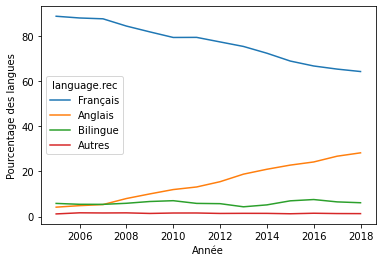

In [91]:
sns.lineplot(data=Phd, x="Date", y="pourcentage", hue="language.rec",hue_order=["Français", 
                                                                                 "Anglais", 
                                                                                 "Bilingue", 
                                                                                 "Autres"])
#plt.title("Proportion des langues")
plt.xlabel("Année")
plt.ylabel("Pourcentage des langues")
plt.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/proportion_langues.png")
plt.show()

In [92]:
### graphique de type area stacked ###

# axe des années en abscisse 
annee = Phd.Date.unique()

# proportion des langues en ordonnée
p_fr = Phd[Phd["language.rec"] == "Français"]["pourcentage"]
p_en = Phd[Phd["language.rec"] == "Anglais"]["pourcentage"]
p_bi = Phd[Phd["language.rec"] == "Bilingue"]["pourcentage"]
p_au = Phd[Phd["language.rec"] == "Autres"]["pourcentage"]

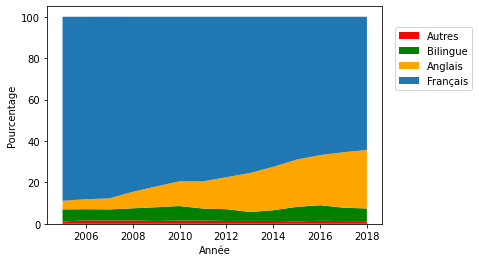

In [93]:
fig, ax = plt.subplots()
ax.stackplot(annee, p_au, p_bi, p_en, p_fr, labels=['Autres', 'Bilingue', 'Anglais', 'Français'], 
              colors=["red", "green", "orange", "tab:blue"])
fig.legend(loc="center right", bbox_to_anchor=(1.12, 0.7), ncol=1)
plt.xlabel("Année")
plt.ylabel("Pourcentage")
fig.savefig("/home/mertes/Documents/DU_Data_Analyst/graphs/stackplot_langue.png", bbox_inches='tight')
plt.show()